## Data Exploration and Preprocessing for the amazon reviews dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
reviews_train = pd.read_csv('./data/Reviews/amazon_review_ID.shuf.lrn.csv')
reviews_test = pd.read_csv('./data/Reviews/amazon_review_ID.shuf.tes.csv')
reviews_train.set_index('ID', inplace=True)
reviews_test.set_index('ID', inplace=True)

In [22]:
print(reviews_train.shape)
reviews_train.head()

(750, 10001)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
ID,,,,,,,,,,,,,,,,,,,,,
0,14,9,8,12,7,4,5,3,2,2,...,0,1,0,1,0,1,1,0,0,Grove
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,Chell
2,17,5,7,12,8,3,0,3,2,3,...,0,1,0,0,0,0,1,0,0,Auken
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,8,4,5,5,1,7,0,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision


In [23]:
print(reviews_test.shape)
reviews_test.head()

(750, 10000)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
ID,,,,,,,,,,,,,,,,,,,,,
750,12,8,9,10,9,4,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
751,7,6,2,5,1,7,9,5,4,11,...,4,0,0,0,0,0,0,0,0,0
752,9,7,3,7,5,3,1,2,5,1,...,0,0,0,0,0,1,0,1,0,0
753,7,7,6,6,5,2,14,0,9,8,...,0,0,0,0,0,0,0,0,1,0
754,26,13,11,15,6,4,3,5,4,1,...,0,1,0,1,0,0,0,1,1,0


In [24]:
print(reviews_train.isnull().values.any())

False


In [25]:
print("Classes of target variable: ", reviews_train['Class'].unique() , "\n")
print("Number of classes: ", reviews_train['Class'].nunique(), "\n")

for count, frequency in reviews_train['Class'].value_counts().value_counts().items():
    print(f"{frequency} classes with nr of instances {count}")


Classes of target variable:  ['Grove' 'Chell' 'Auken' 'Davisson' 'Vision' 'Harp' 'Calvinnme' 'Vernon'
 'Cutey' 'Hayes' 'Robert' 'Wilson' 'Sherwin' 'Lee' 'Mahlers2nd' 'Merritt'
 'Power' 'Lovitt' 'Peterson' 'Nigam' 'Agresti' 'Comdet' 'Blankenship'
 'Chandler' 'Walters' 'Mark' 'Neal' 'Brody' 'Mitchell' 'Taylor' 'Shea'
 'Chachra' 'Messick' 'Kolln' 'Ashbacher' 'Johnson' 'Koenig' 'Corn' 'Brown'
 'Riley' 'Engineer' 'Lawyeraau' 'Janson' 'McKee' 'Dent' 'Cholette'
 'Goonan' 'CFH' 'Bukowsky' 'Morrison'] 

Number of classes:  50 

9 classes with nr of instances 14
8 classes with nr of instances 17
6 classes with nr of instances 15
6 classes with nr of instances 12
4 classes with nr of instances 18
4 classes with nr of instances 11
3 classes with nr of instances 13
2 classes with nr of instances 21
2 classes with nr of instances 20
2 classes with nr of instances 19
2 classes with nr of instances 16
1 classes with nr of instances 10
1 classes with nr of instances 9


In [26]:
reviews_train.rename(columns={'Class': 'class'}, inplace=True)

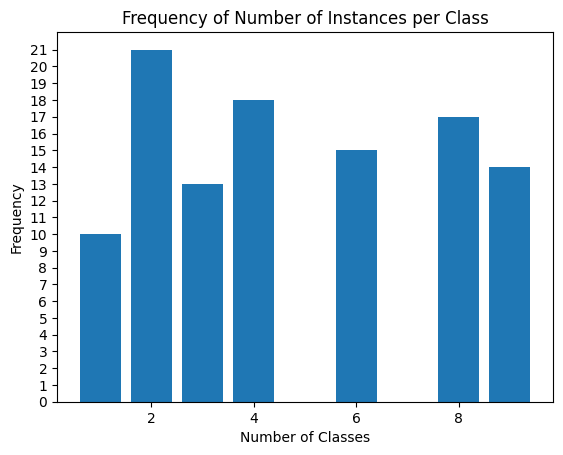

In [27]:
instances_per_class_counts = reviews_train['class'].value_counts().value_counts().reset_index()
instances_per_class_counts.columns = ['Frequency', 'Count']

plt.bar(instances_per_class_counts['Count'], instances_per_class_counts['Frequency'])
plt.xlabel('Number of Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Instances per Class')
plt.yticks(range(int(instances_per_class_counts['Frequency'].max()) + 1))
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Grove'),
  Text(1, 0, 'Chell'),
  Text(2, 0, 'Auken'),
  Text(3, 0, 'Davisson'),
  Text(4, 0, 'Vision'),
  Text(5, 0, 'Harp'),
  Text(6, 0, 'Calvinnme'),
  Text(7, 0, 'Vernon'),
  Text(8, 0, 'Cutey'),
  Text(9, 0, 'Hayes'),
  Text(10, 0, 'Robert'),
  Text(11, 0, 'Wilson'),
  Text(12, 0, 'Sherwin'),
  Text(13, 0, 'Lee'),
  Text(14, 0, 'Mahlers2nd'),
  Text(15, 0, 'Merritt'),
  Text(16, 0, 'Power'),
  Text(17, 0, 'Lovitt'),
  Text(18, 0, 'Peterson'),
  Text(19, 0, 'Nigam'),
  Text(20, 0, 'Agresti'),
  Text(21, 0, 'Comdet'),
  Text(22, 0, 'Blankenship'),
  Text(23, 0, 'Chandler'),
  Text(24, 0, 'Walters'),
  Text(25, 0, 'Mark'),
  Text(26, 0, 'Neal'),
  Text(27, 0, 'Brody'),
  Text(28, 0, 'Mitchell'),
  Text(29, 0, 'Taylor'),
  Text(30, 0, 'Shea'),
  Te

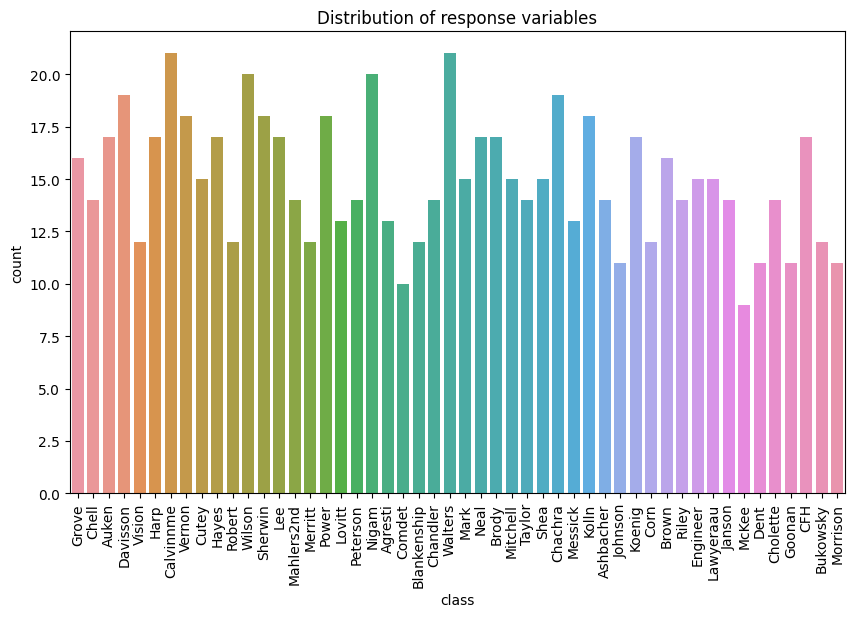

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=reviews_train).set(title='Distribution of response variables')
plt.xticks(rotation='vertical')

## Trying out some stuff here

In [29]:
# Is this neccessary or not?
#reviews_train['class'] = reviews_train['Class'].factorize()[0]

# Features
X = reviews_train.drop(['class'], axis=1) 

# Target variable
y = reviews_train['class']

# Split the dataset into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print ("Training Dataset Shape:", X_train.shape, y_train.shape, "\n")
print ("Test Dataset Shape:", X_test.shape, y_test.shape, "\n")

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create the linear model SGDclassifier
from sklearn.linear_model import SGDClassifier
linear_clf = SGDClassifier()

linear_clf.fit(X_train, y_train)

y_train_pred = linear_clf.predict(X_test)

# Which average to choose???
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_train_pred))
print("F1 score:",metrics.f1_score(y_test, y_train_pred, average='macro'))
print("Precision:",metrics.precision_score(y_test, y_train_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_train_pred, average='macro'))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_train_pred))


Training Dataset Shape: (525, 10000) (525,) 

Test Dataset Shape: (225, 10000) (225,) 

Accuracy: 0.6
F1 score: 0.5744699049174753
Precision: 0.6432766677766678
Recall: 0.6081269841269841
Confusion matrix: [[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 1 5]]


/Users/rebekaangyal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
